## 1. Extract the contours of fruits from the images in the fruit dataset. Fill in the contours with a mask to achieve separation of the foreground and background. Refer to the provided example image for guidance. (10 points)

In [112]:
import os
import pandas as pd

random_state = 203
dataDir = 'fruits_v2'
phases = ['train', 'valid', 'test']
classes = ['Apple', 'Banana', 'Carrot', 'Orange']
class_labels = {'Apple': 0, 'Banana': 1, 'Carrot': 2, 'Orange': 3}
df = pd.DataFrame([], columns=['filepath', 'class', 'label', 'phase'])

for phs in phases:
    for c in classes:
        imgDir = os.path.join(dataDir, phs, c)
        filename = [os.path.join(imgDir, _) for _ in os.listdir(
            imgDir) if (_.endswith('.jpg') or _.endswith('.JPEG'))]
        tmp = pd.DataFrame({'filepath': filename})
        tmp['class'] = c
        tmp['label'] = class_labels[c]
        tmp['phase'] = phs
        df = pd.concat([df, tmp])

df.label = df.label.astype('int')
df = df.set_index([pd.Series(range(df.shape[0]))])
df.sample(n=5)
#pd.set_option('display.max_rows', None)
#print(df)

                                               filepath   class  label  phase
0     fruits_v2/train/Apple/7fc22c6fb981184c_jpg.rf....   Apple      0  train
1     fruits_v2/train/Apple/Image_49_jpg.rf.5df5e66a...   Apple      0  train
2     fruits_v2/train/Apple/e8b1e427d08bb6fc_jpg.rf....   Apple      0  train
3     fruits_v2/train/Apple/4778203_png.rf.9834ec56e...   Apple      0  train
4     fruits_v2/train/Apple/oil1_jpg.rf.02aeacb6cd64...   Apple      0  train
5     fruits_v2/train/Apple/apple5_jpg.rf.b61a35706b...   Apple      0  train
6     fruits_v2/train/Apple/75533c5e58f7fca8_jpg.rf....   Apple      0  train
7     fruits_v2/train/Apple/fruit-2689952_1920-web_j...   Apple      0  train
8     fruits_v2/train/Apple/365a4366bf0347fc_jpg.rf....   Apple      0  train
9     fruits_v2/train/Apple/538234f9e3d401e4d128a6ab...   Apple      0  train
10    fruits_v2/train/Apple/326f30a4d7380f96_jpg.rf....   Apple      0  train
11    fruits_v2/train/Apple/Image_71_png.rf.c0ca6532...   Apple 

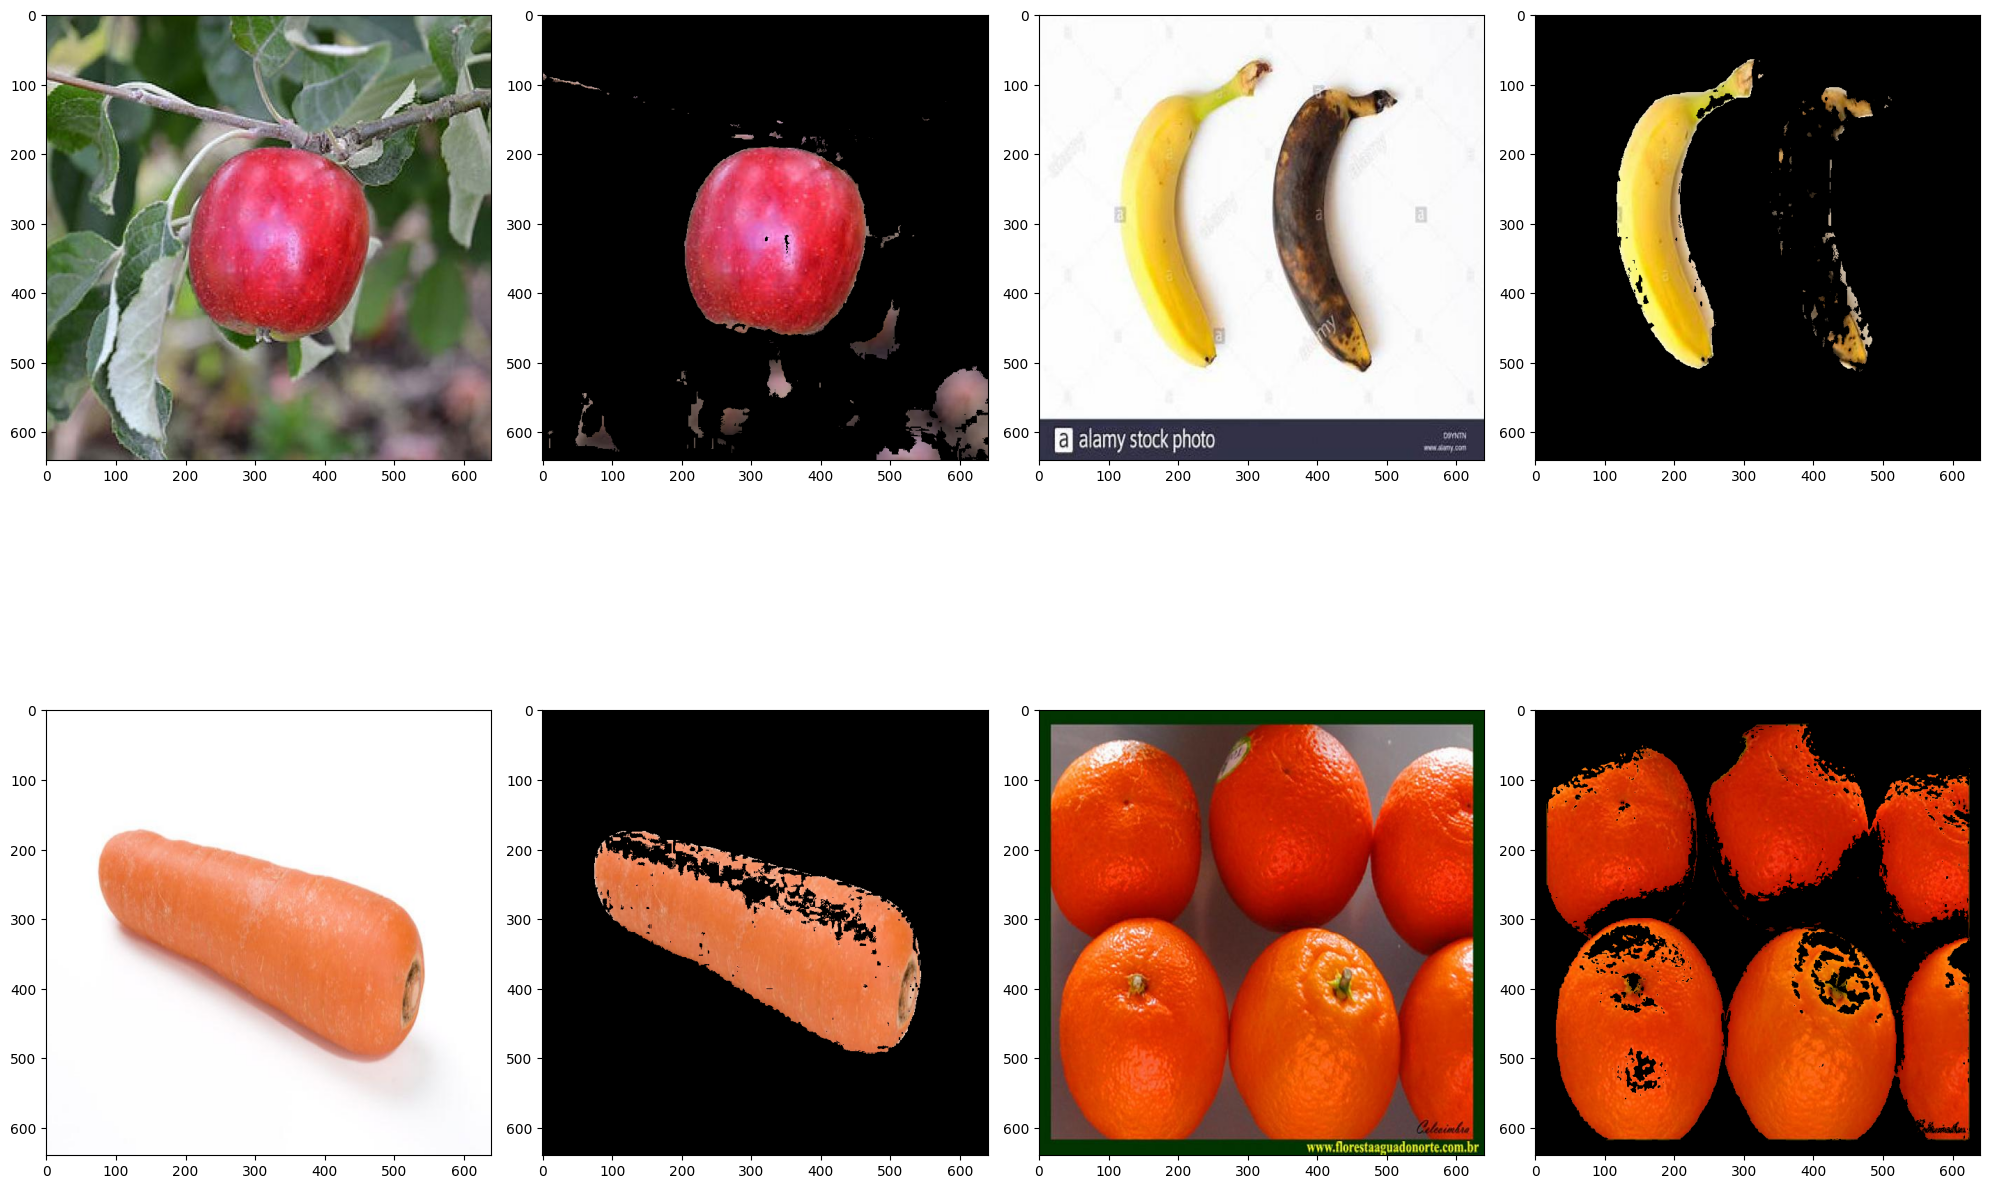

In [113]:
from skimage import io, color, transform, feature, morphology, filters
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
# path = df_examples.filepath.values[100]
# # 讀取圖片
# img_skimage = io.imread(path)

# # 將 RGB 圖片轉換成 HSV
# hsv_skimage = color.rgb2hsv(img_skimage)

#apple
apple_label = io.imread(df.filepath.values[269])
apple_hsv_skimage = color.rgb2hsv(apple_label)
red_min = ((apple_hsv_skimage[..., 0] >= 0) & (apple_hsv_skimage[..., 0] <= 10/180) &
               (apple_hsv_skimage[..., 1] >= 43/255) & (apple_hsv_skimage[..., 2] >=46/255))
red_max = ((apple_hsv_skimage[..., 0] >= 156/180) & (apple_hsv_skimage[..., 0] <= 180/180) &
               (apple_hsv_skimage[..., 1] >= 43/255) & (apple_hsv_skimage[..., 2] >= 46/255))
color_mask = red_min | red_max
apple_img_color_skimage = apple_label * color_mask[:, :, np.newaxis]

#banana
banana_label = io.imread(df.filepath.values[695])
b_hsv_skimage = color.rgb2hsv(banana_label)
banana_mask = ((b_hsv_skimage[..., 0] >= 15/180) & (b_hsv_skimage[..., 0] <= 30/180) &
                  (b_hsv_skimage[..., 1] >= 43/255) & (b_hsv_skimage[..., 2] >= 46/255))
banana_img_color_skimage = banana_label * banana_mask[:, :, np.newaxis]

#carrot
carrot_label = io.imread(df.filepath.values[787])
c_hsv_skimage = color.rgb2hsv(carrot_label)
carrot_mask = ((c_hsv_skimage[..., 0] >= 8/180) & (c_hsv_skimage[..., 0] <= 25/180) &
                  (c_hsv_skimage[..., 1] >= 43/255) & (c_hsv_skimage[..., 2] >= 46/255))
carrot_img_color_skimage = carrot_label * carrot_mask[:, :, np.newaxis]

#orange
orange_label = io.imread(df.filepath.values[991])
o_hsv_skimage = color.rgb2hsv(orange_label)
orange_mask = ((o_hsv_skimage[..., 0] >= 3/180) & (o_hsv_skimage[..., 0] <= 25/180) &
                  (o_hsv_skimage[..., 1] >= 220/255) & (o_hsv_skimage[..., 2] >= 20/255))
orange_img_color_skimage = orange_label * orange_mask[:, :, np.newaxis]


# 將 RGB 圖片轉換成 HSV
hsv_skimage = color.rgb2hsv(img_skimage)


plt.figure(figsize=(20,16))
plt.subplot(2,4,1)
plt.imshow(apple_label)
plt.subplot(2,4,2)
plt.imshow(apple_img_color_skimage)
plt.subplot(2,4,3)
plt.imshow(banana_label)
plt.subplot(2,4,4)
plt.imshow(banana_img_color_skimage)
plt.subplot(2,4,5)
plt.imshow(carrot_label)
plt.subplot(2,4,6)
plt.imshow(carrot_img_color_skimage)
plt.subplot(2,4,7)
plt.imshow(orange_label)
plt.subplot(2,4,8)
plt.imshow(orange_img_color_skimage)
plt.tight_layout()
plt.show()

## 2. Use Fourier Descriptors to transform the contours extracted in the first section into high-dimensional vectors of various levels. (10 points)

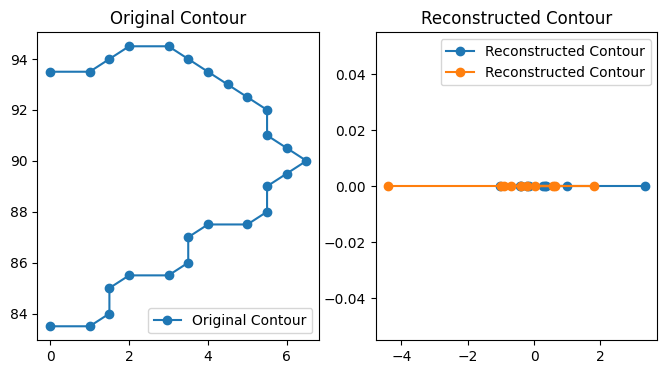

In [144]:
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt

def compute_fourier_descriptors(contour, num_coefficients=10):
    x, y = contour[:, 1], contour[:, 0]  # Swap x and y due to skimage coordinate convention
    z = x + 1j * y
    fft_result = np.fft.fft(z)
    descriptors = np.fft.fftshift(fft_result)[:num_coefficients]
    return descriptors

def plot_contour_and_reconstruction(original_contour, reconstructed_contour):
    plt.figure(figsize=(8, 4))
    
    plt.subplot(121)
    plt.plot(original_contour[:, 1], original_contour[:, 0], label='Original Contour', marker='o')
    plt.title('Original Contour')
    plt.legend()

    plt.subplot(122)
    plt.plot(np.real(reconstructed_contour), np.imag(reconstructed_contour), label='Reconstructed Contour', marker='o')
    plt.title('Reconstructed Contour')
    plt.legend()

    plt.show()

# Extract contours using skimage.measure.find_contours
def extract_contours(image_mask):
    contours = measure.find_contours(image_mask, 0.5)
    return contours

# Example usage for one of the images
apple_contours = extract_contours(color_mask)

# Assuming only one contour for simplicity
if apple_contours:
    apple_contour = apple_contours[0]

    # Compute Fourier descriptors
    descriptors = compute_fourier_descriptors(apple_contour)

    # Inverse Fourier transform to reconstruct the contour
    reconstructed_z = np.fft.ifft(np.fft.ifftshift(descriptors))
    reconstructed_contour = np.column_stack((np.real(reconstructed_z), np.imag(reconstructed_z)))

    # Plot the original and reconstructed contours
    plot_contour_and_reconstruction(apple_contour, reconstructed_contour)


## 3. Calculate the texture features of the extracted fruits (Figure 1.c) using the Gray-Level Co-Occurrence Matrix (GLCM) practiced in the course. (10 points)

In [114]:
from skimage.feature import graycomatrix, graycoprops
import numpy as np
from skimage import io
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

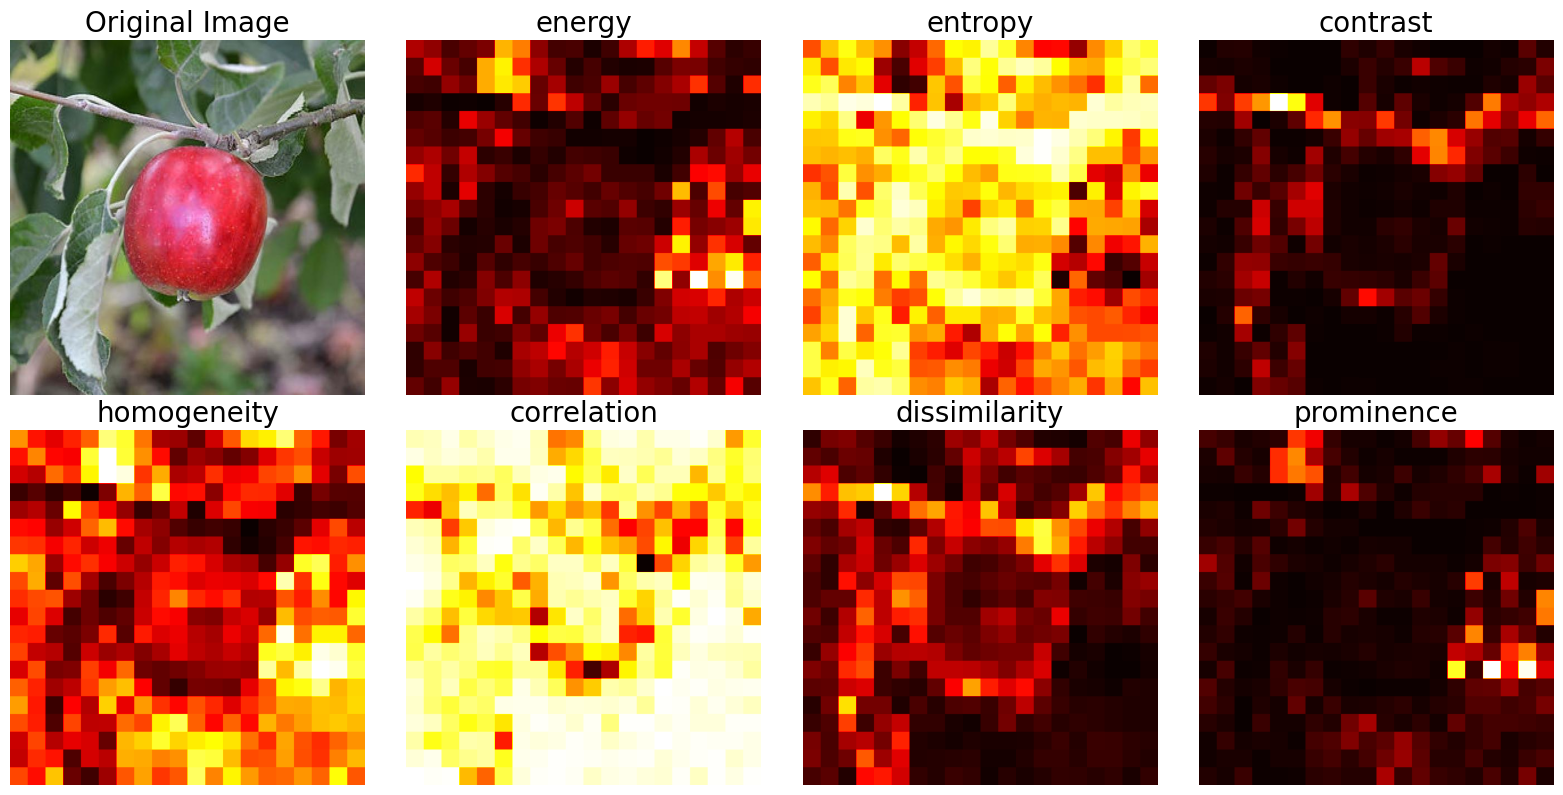

In [115]:
def generate_heatmaps(image_path, patch_size):
    # Load the image and convert it to grayscale
    image = io.imread(image_path)
    gray_image = rgb2gray(image)

    gray_image = (gray_image * 255).astype(np.uint8)

    # Assuming the patches are non-overlapping, calculate the number of patches
    patches = [gray_image[i:i+patch_size, j:j+patch_size]
               for i in range(0, gray_image.shape[0], patch_size)
               for j in range(0, gray_image.shape[1], patch_size)]

    # List to store the heatmaps
    heatmaps = []

    # GLCM properties to compute
    properties = ['energy', 'entropy', 'contrast', 'homogeneity', 'correlation', 'dissimilarity', 'prominence']

    for prop in properties:
        # Initialize an empty image to store the GLCM property values
        prop_image = np.zeros_like(gray_image, dtype=np.float64)

        for i, patch in enumerate(patches):
            # Calculate the row, col position of the patch in the original image
            row, col = divmod(i, gray_image.shape[1] // patch_size)
            # Compute GLCM
            glcm = graycomatrix(patch, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)
            # Compute GLCM property
            if prop == 'entropy':
                prop_value = -np.sum(glcm*np.log2(glcm + np.finfo(float).eps))
            elif prop == 'prominence':
                prop_value = graycoprops(glcm, 'ASM').mean()
            else:
                prop_value = graycoprops(glcm, prop).mean()

            # Fill the corresponding area of the prop_image
            prop_image[row*patch_size:(row+1)*patch_size, col*patch_size:(col+1)*patch_size] = prop_value

        # Normalize the prop_image values between 0 and 1
        min_val = np.min(prop_image)
        max_val = np.max(prop_image)
        prop_image = (prop_image - min_val) / (max_val - min_val)

        heatmaps.append(prop_image)

    # Plotting the heatmaps
    fig, axs = plt.subplots(2, 4, figsize=(16, 8))

    # Set the figure background to transparent
    fig.patch.set_facecolor('none')

    # Plot the original grayscale image
    axs[0, 0].imshow(image)
    axs[0, 0].set_title('Original Image', fontsize=20)
    axs[0, 0].axis('off')

    # Plot the heatmaps
    for i, ax in enumerate(axs.flat[1:]):  # Start from the second subplot
        ax.imshow(heatmaps[i], cmap='hot')
        ax.set_title(properties[i], fontsize=20)
        ax.axis('off')

    # Hide the empty subplot(s)
    for i in range(len(properties) + 1, 8):  # Adjust as needed
        axs.flat[i].axis('off')

    plt.tight_layout()
    #plt.savefig(f'{image_path}heatmaps.jpg', transparent=True)
    plt.show()

patch_size = 32
path = df.filepath.values[269]
generate_heatmaps(path, patch_size=patch_size)

## 4. Organize and compile the extracted features into a data frame as illustrated in the provided figure. (10 points)

In [116]:
df_shape = pd.DataFrame([], columns=classes, index=phases)

for phs in phases:
    for c in classes:
        mask2 = df['phase'] == phs
        mask1 = df['class'] == c
        df_shape.loc[phs][c] = df[mask1 & mask2].shape[0]

df_shape

,Apple,Banana,Carrot,Orange
train,356,385,230,318
valid,43,46,30,42
test,39,51,33,37


In [117]:
from skimage.feature.texture import graycomatrix, graycoprops
from tqdm.notebook import tqdm
import numpy as np
from skimage import io, color

def add_glcm_skimage(df, features):
    df_glcm = df.copy(deep=True)
    degrees = [0]

    for i in tqdm(df_glcm.index):
        for feat in features:
            path = df_glcm.loc[i, 'filepath']

            # Using skimage to read the image and convert it to grayscale
            img_skimage = io.imread(path)
            gray_skimage = color.rgb2gray(img_skimage) * 255
            gray_skimage = gray_skimage.astype(np.uint8)

            glcm = graycomatrix(gray_skimage,
                                distances=[5],
                                angles=np.radians(degrees),
                                levels=256,
                                symmetric=True,
                                normed=True)
            val = graycoprops(glcm, feat)
            for j, degree in enumerate(degrees):
                df_glcm.loc[i, feat] = val[0][j]
    return df_glcm

In [118]:
n = 5
glcm_features = ['dissimilarity', 'homogeneity',
            'contrast', 'energy', 'ASM', 'correlation']
df = add_glcm_skimage(df, glcm_features)
df.head(n)

  0%|          | 0/1610 [00:00<?, ?it/s]

,filepath,class,label,phase,dissimilarity,homogeneity,contrast,energy,ASM,correlation
0,fruits_v2/train/Apple/7fc22c6fb981184c_jpg.rf....,Apple,0,train,4.044631,0.420027,110.318735,0.037175,0.001382,0.989856
1,fruits_v2/train/Apple/Image_49_jpg.rf.5df5e66a...,Apple,0,train,3.389131,0.601718,109.727522,0.073947,0.005468,0.968874
2,fruits_v2/train/Apple/e8b1e427d08bb6fc_jpg.rf....,Apple,0,train,15.480482,0.196735,974.234651,0.049795,0.002480,0.871616
3,fruits_v2/train/Apple/4778203_png.rf.9834ec56e...,Apple,0,train,4.093863,0.616614,154.124163,0.154959,0.024012,0.988667
4,fruits_v2/train/Apple/oil1_jpg.rf.02aeacb6cd64...,Apple,0,train,6.062060,0.568063,247.219210,0.115886,0.013430,0.976544


In [119]:
color_features = ['b_mean', 'b_std', 'g_mean', 'g_std', 'r_mean', 'r_std']
def add_color_skimage(df, features):
    df_color = df.copy(deep=True)
    degrees = [0]

    for i in tqdm(df_color.index):
        path = df_color.loc[i, 'filepath']

        # Using skimage to read the image
        img_skimage = io.imread(path)

        # skimage reads images in RGB order, so we don't need to swap channels
        for j in range(3):
            df_color.loc[i, color_features[j*2]] = np.mean(img_skimage[:, :,j])
            df_color.loc[i, color_features[j*2+1]] = np.std(img_skimage[:, :,j])

    return df_color

In [120]:
df = add_color_skimage(df, color_features)
df.head(n)

  0%|          | 0/1610 [00:00<?, ?it/s]

,filepath,class,label,phase,dissimilarity,homogeneity,contrast,energy,ASM,correlation,b_mean,b_std,g_mean,g_std,r_mean,r_std
0,fruits_v2/train/Apple/7fc22c6fb981184c_jpg.rf....,Apple,0,train,4.044631,0.420027,110.318735,0.037175,0.001382,0.989856,166.416245,53.860000,135.903792,80.230315,158.633196,92.806607
1,fruits_v2/train/Apple/Image_49_jpg.rf.5df5e66a...,Apple,0,train,3.389131,0.601718,109.727522,0.073947,0.005468,0.968874,221.381328,36.646077,199.435327,41.669294,148.911965,74.614494
2,fruits_v2/train/Apple/e8b1e427d08bb6fc_jpg.rf....,Apple,0,train,15.480482,0.196735,974.234651,0.049795,0.002480,0.871616,118.768723,65.805898,121.834607,60.767523,86.744553,76.416903
3,fruits_v2/train/Apple/4778203_png.rf.9834ec56e...,Apple,0,train,4.093863,0.616614,154.124163,0.154959,0.024012,0.988667,216.979827,39.220727,175.551641,94.775514,177.441252,93.504804
4,fruits_v2/train/Apple/oil1_jpg.rf.02aeacb6cd64...,Apple,0,train,6.062060,0.568063,247.219210,0.115886,0.013430,0.976544,237.547109,12.615325,183.084226,91.601358,189.314163,84.420525


In [126]:
from sklearn.preprocessing import StandardScaler


X_train = df[df['phase'] == 'train'][glcm_features]
Y_train = df.loc[X_train.index, 'label']

X_valid = df[df['phase'] == 'valid'][glcm_features]
Y_valid = df.loc[X_valid.index, 'label']

X_test = df[df['phase'] == 'test'][glcm_features]
Y_test = df.loc[X_test.index, 'label']

# Data normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

df[df['phase'] == 'train'][glcm_features]

,dissimilarity,homogeneity,contrast,energy,ASM,correlation
0,4.044631,0.420027,110.318735,0.037175,0.001382,0.989856
1,3.389131,0.601718,109.727522,0.073947,0.005468,0.968874
2,15.480482,0.196735,974.234651,0.049795,0.002480,0.871616
3,4.093863,0.616614,154.124163,0.154959,0.024012,0.988667
4,6.062060,0.568063,247.219210,0.115886,0.013430,0.976544
5,4.164678,0.589531,177.335283,0.237978,0.056634,0.987740
6,27.077867,0.054179,1485.682778,0.008220,0.000068,0.713664
7,13.978708,0.114973,566.451208,0.013817,0.000191,0.821948
8,13.443994,0.134349,631.668885,0.012411,0.000154,0.926942
9,8.155662,0.164709,174.167906,0.015612,0.000244,0.945263


## 5. Use the three machine learning models introduced in the course (Decision Tree, K-Nearest Neighbors (K-NN), Support Vector Machine (SVM)) to classify the features described above.(10 points)

In [122]:
from sklearn.metrics import roc_auc_score as ras
from sklearn import tree

# Train a decision tree model
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
decision_tree = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=random_state)
decision_tree.fit(X_train, Y_train.values)

# Evaluate the decision tree accuracy on train and validation sets
train_preds = decision_tree.predict_proba(X_train)
print('Training Accuracy : ', ras(Y_train.values, train_preds, multi_class='ovr'))
valid_preds = decision_tree.predict_proba(X_valid)
print('Validation Accuracy : ', ras(Y_valid.values, valid_preds, multi_class='ovr'))

Training Accuracy :  0.9999887340039079
Validation Accuracy :  0.7054428602142032


In [137]:
from sklearn.neighbors import KNeighborsClassifier

# 建立 KNN 模型
knnModel = KNeighborsClassifier(n_neighbors=3)
# 使用訓練資料訓練模型
knnModel.fit(X_train,Y_train)
# 使用訓練資料預測分類
predicted = knnModel.predict(X_train)
# 預測成功的比例
print('Training Accuracy : ',knnModel.score(X_train,Y_train))
print('Validation Accuracy : ',knnModel.score(X_test,Y_test))


Training Accuracy :  0.7688130333591932
Validation Accuracy :  0.625


In [143]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
svm_classifier = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, Y_train)

best_svm = grid_search.best_estimator_
svm_predictions = best_svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(Y_test, svm_predictions)

# Display the results
print("SVM Accuracy:", svm_accuracy)

# Optionally, display more detailed metrics using classification report
print("\nSVM Classification Report:\n", classification_report(Y_test, svm_predictions))


SVM Accuracy: 0.6875

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.72      0.64        39
           1       0.70      0.59      0.64        51
           2       0.87      0.61      0.71        33
           3       0.70      0.86      0.77        37

    accuracy                           0.69       160
   macro avg       0.71      0.69      0.69       160
weighted avg       0.70      0.69      0.69       160

